In [7]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import scipy as s

C:\Users\Acer\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
def linfunc(x,A,B):
    return A*x + B

In [9]:
inc_rad = 0.02/2

# Caracterización

In [4]:
A = np.array([-1980,-1540,-1140,-760,-360,464,816,1230,1660,2080])
rad1 = np.array([-0.5,-0.4,-0.3,-0.2,-0.1,0.1,0.2,0.3,0.4,0.5])

In [18]:
np.array([inc_rad]*len(A))

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

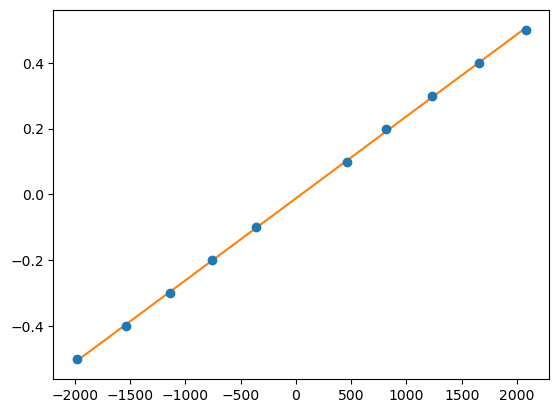

In [20]:

plt.errorbar(A,rad1,fmt="o",xerr=np.array([10]*len(A)),yerr=np.array([inc_rad]*len(A)))

params1, pcov1 = s.optimize.curve_fit(linfunc,A,rad1)

plt.plot(A, linfunc(A,*params1))

In [21]:
params1, np.sqrt(np.diag(pcov1))

(array([ 0.0002489 , -0.01169813]), array([1.26148627e-06, 1.68184334e-03]))

In [22]:
adjust = params1[1]

# Actividad 1

In [25]:
rad2 = np.array([1.34,2.18,2.6,2.8,3.22,3.42,3.82,4.62]) + adjust
mass = np.array([-400,-200,-100,-50,50,100,200,400])
torque = 2*mass*9.81*12.6e-3/1000
torque

array([-0.0988848, -0.0494424, -0.0247212, -0.0123606,  0.0123606,
        0.0247212,  0.0494424,  0.0988848])

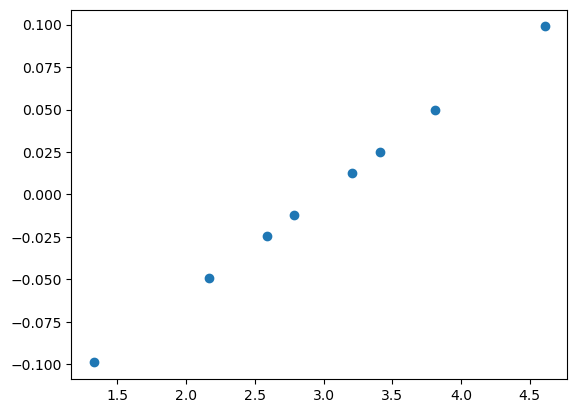

In [29]:
plt.scatter(rad2,torque)

params2, pcov2 = s.optimize.curve_fit(linfunc,rad2,torque)


In [30]:
params2, np.sqrt(np.diag(pcov2))

(array([ 0.06026778, -0.18009832]), array([0.00032528, 0.00101952]))

# Actividad 2

In [36]:
N = np.array([0,2,4,6,8])
T = np.array([1.16,1.3,1.44,1.56,1.68])
T_scale = T/(2*np.pi)
T_scale_2 = T_scale**2

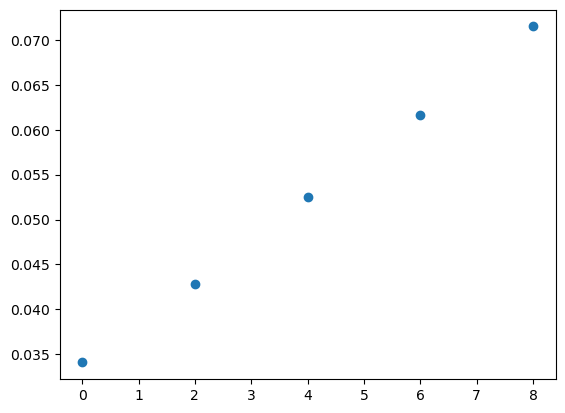

In [37]:
plt.scatter(N,T_scale_2)

params3, pcov3 = s.optimize.curve_fit(linfunc,N,T_scale_2)

In [38]:
params3, np.sqrt(np.diag(pcov3))

(array([0.00468256, 0.03378048]), array([5.19141315e-05, 2.54326264e-04]))

In [56]:
R2 = 0.047
R1 = 0.022
M = 0.212

delta_I = M * (R1**2 + R2**2)/2
I = 1 * (13e-2/2)**2 /2
kappa_teo = 0.058

delta_I, I

(0.000285458, 0.0021125000000000002)

In [57]:
delta_I_exp = params3[0]*kappa_teo
delta_I_exp

0.00027158839311017984

In [58]:
I_exp = params3[1]*kappa_teo
I_exp

0.0019592679923590033

# Actividad 3

In [118]:
sigma_I = 0.01
I1 = np.array([-2, -1.75, -1.5, -1.25, -1, -0.75, -0.5, -0.24, 0, 0.24, 0.5, 0.75, 1, 1.26, 1.5, 1.75, 2])

In [119]:
rad3 = np.array([2.12, 2.18, 2.26, 2.34, 2.42, 2.54, 2.68, 2.84, 3, 3.22, 3.32, 3.46, 3.58, 3.68, 3.74, 3.82, 3.88]) + adjust
params4, pcov4 = s.optimize.curve_fit(linfunc,I1,rad3)

Residuals = (rad3 - linfunc(I1,*params4))

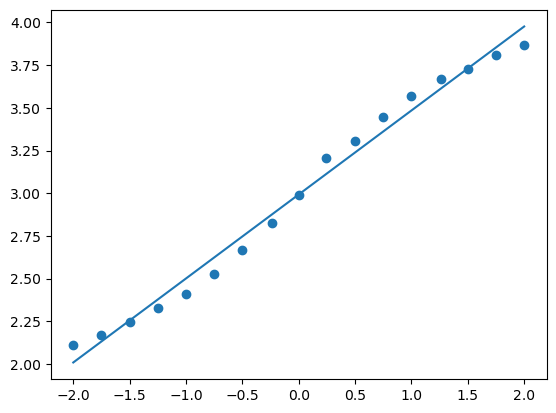

In [120]:
plt.scatter(I1,rad3)
plt.plot(I1,linfunc(I1,*params4))

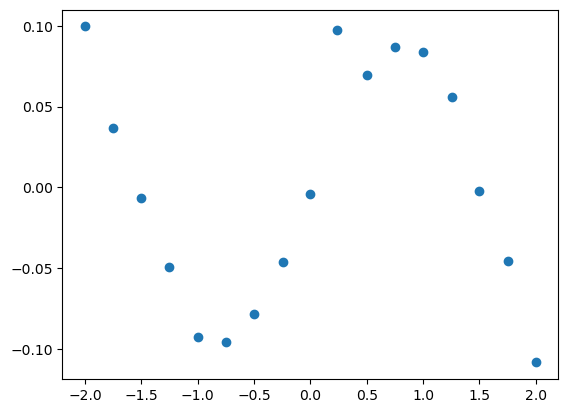

In [123]:
plt.scatter(I1,Residuals)

In [122]:
params4, np.sqrt(np.diag(pcov4))

(array([0.49197759, 2.99271835]), array([0.01494222, 0.0183059 ]))

In [124]:
k_teo = 3234e-6
params4[0]*kappa_teo/k_teo, np.sqrt(np.diag(pcov4))[0]*kappa_teo/k_teo

(8.82334580335538, 0.2679804563940194)